### Bibliotecas a serem utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carregando a base contendo os dados fundamentalistas

In [2]:
base = pd.read_excel('IBOV_FUND_NEW.xlsx')

### Vamos visualizar a estrutura da base

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', -1)

base.head()

,Ticker,Tipo,Empresa,Setor,Subsetor,Valor de Mercado,Valor da Firma,Último Balanço Processado,Número de Ações,P/L,P/VP,P/EBIT,PSR,P/Ativos,P/Capital de Giro,P/Ativo Circulante Liq.,DY,EV/EBITDA,EV/EBIT,Crescimento da Receita (5 anos),LPA,VPA,Margem Bruta,Margem EBIT,Margem Líquida,EBIT/Ativo,ROIC,ROE,Liquidez Corrente,Div Bruta/Patrimônio,Ativo de Giro,Ativo,Disponibilidades,Ativo Circulante,Dívida Bruta,Dívida Líquida,Patrimônio Líquido,Receita Líquida,EBIT,Lucro Líquido,Carteira de Crédito,Depósitos,Resultado Intermediação Financeira (12 Meses),Receita de Serviços (12 Meses)
0,CRDE3,ON,CR2 ON,Construção e Engenharia,Construção Civil,53768400,7.462600e+06,31/12/2019,2422000,5.76,0.34,7.06,1.59,0.31,0.84,0.96,0.377,0.98,0.98,0.086,3.86,65.10,0.038,0.225,0.294,0.044,0.070,0.059,9.43,NaN,0.19,173489000,6.123100e+07,7.188800e+07,0.000000e+00,6.123100e+07,157677000,3.376300e+07,7.611000e+06,9341000,NaN,NaN,NaN,NaN
1,MMAQ4,PN,MINASMÁQUINAS S/A PN,Comércio,Material de Transporte,9002700,2.196530e+07,31/12/2019,45000,0.27,0.06,1.17,0.02,0.04,0.08,0.08,0.452,3.80,2.85,0.220,745.27,3567.29,0.081,0.017,0.074,0.031,0.052,0.209,2.52,0.06,1.84,245110000,3.980700e+07,1.981050e+08,8.839000e+06,3.096800e+07,160528000,4.507660e+08,7.716000e+06,33537000,NaN,NaN,NaN,NaN
2,SMLS3,ON NM,SMILES ON NM,Diversos,Programas de Fidelização,1411690000,2.377730e+08,31/12/2019,124159000,2.25,1.17,1.97,1.34,0.49,0.98,1.30,0.313,0.32,0.33,0.069,5.05,9.71,0.930,0.683,0.596,0.249,0.451,0.520,2.09,NaN,0.36,2884580000,1.173920e+09,2.763450e+09,0.000000e+00,1.173920e+09,1205340000,1.051120e+09,7.183080e+08,626725000,NaN,NaN,NaN,NaN
3,CGAS3,ON,COMPANHIA DE GÁS DE SÃO PAULO COMGÁS ON,Gás,Gás,15902500000,2.006410e+10,31/12/2019,132521000,11.63,30.61,7.18,1.67,1.88,1004.14,3.09,0.226,7.86,9.06,0.097,10.32,3.92,0.327,0.233,0.144,0.262,0.356,2.632,0.99,10.10,1.13,8451720000,1.083410e+09,2.792060e+09,5.244940e+09,4.161530e+09,519508000,9.514220e+09,2.214870e+09,1367180000,NaN,NaN,NaN,NaN
4,QUAL3,ON NM,QUALICORP ON NM,Saúde,"Serviços Médico Hospitalares, Análises e Diagnósticos",6066540000,6.905130e+09,31/12/2019,284014000,15.45,4.25,7.70,3.03,1.79,13.34,5.91,0.224,5.91,8.76,0.028,1.38,5.02,0.811,0.393,0.196,0.233,0.298,0.275,1.97,0.93,0.59,3380060000,4.918080e+08,9.259460e+08,1.330400e+09,8.385920e+08,1426840000,2.003010e+09,7.880290e+08,392756000,NaN,NaN,NaN,NaN


In [4]:
base["Margem Bruta"] = pd.to_numeric(base["Margem Bruta"])

In [5]:
base.dtypes

Ticker                                           object 
Tipo                                             object 
Empresa                                          object 
Setor                                            object 
Subsetor                                         object 
Valor de Mercado                                 int64  
Valor da Firma                                   float64
Último Balanço Processado                        object 
Número de Ações                                  int64  
P/L                                              float64
P/VP                                             float64
P/EBIT                                           float64
PSR                                              float64
P/Ativos                                         float64
P/Capital de Giro                                float64
P/Ativo Circulante Liq.                          float64
DY                                               float64
EV/EBITDA                      

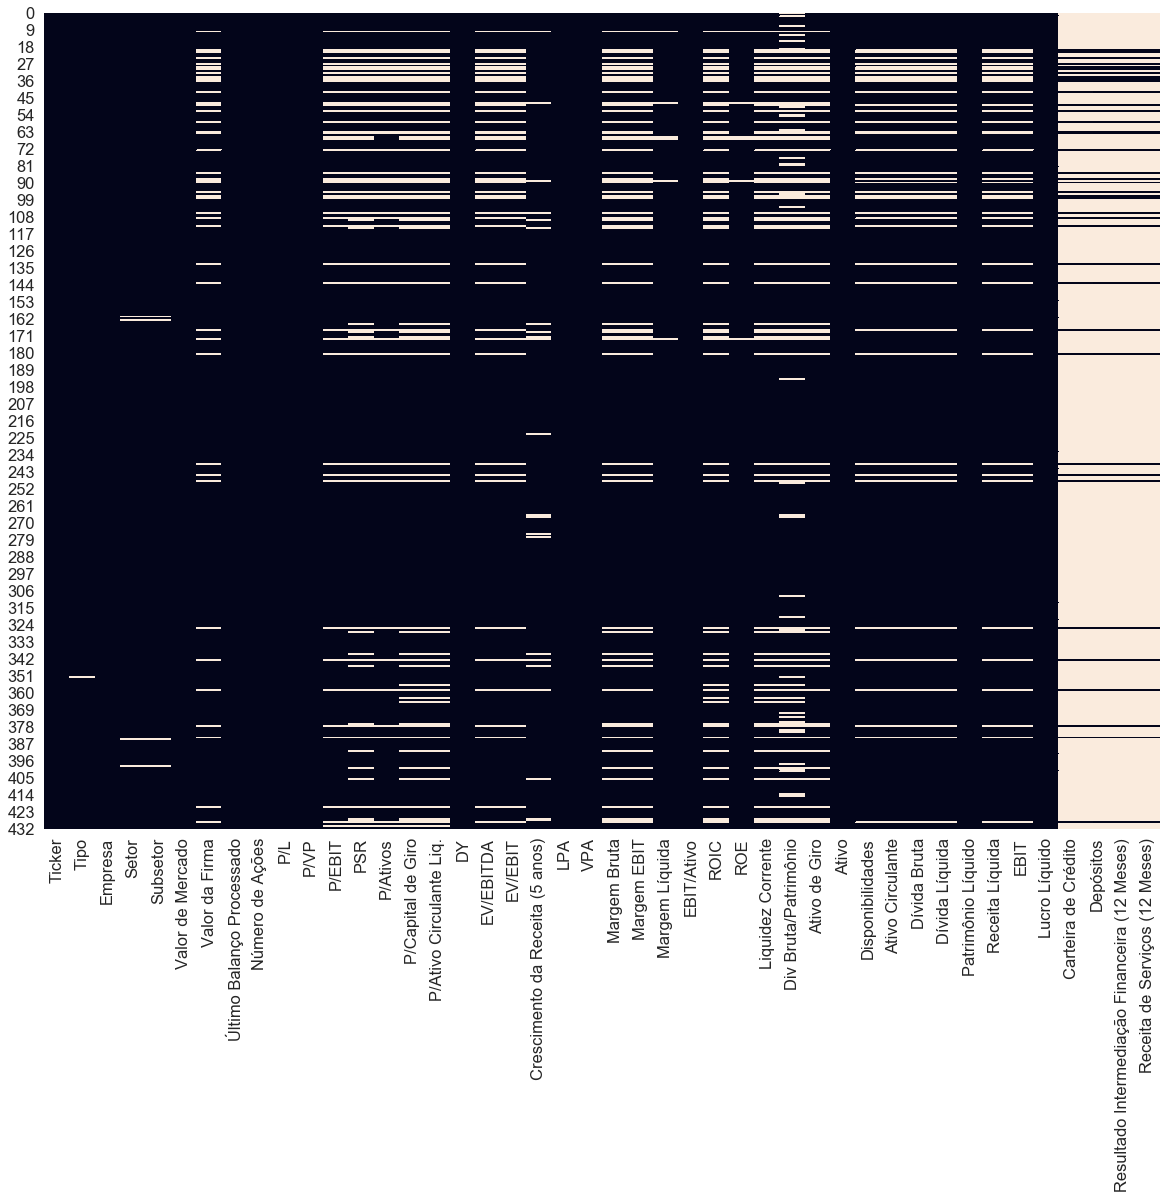

In [6]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
sns.heatmap(base.isnull(), cbar=False)

In [7]:
percent_missing = base.isnull().sum() * 100 / len(base)
missing_value_df = pd.DataFrame({'Nome da Coluna': base.columns,
                                 'Porcentagem de missings': percent_missing})

missing_value_df.sort_values('Porcentagem de missings', inplace=True)

missing_value_df

,Nome da Coluna,Porcentagem de missings
Ticker,Ticker,0.000000
Lucro Líquido,Lucro Líquido,0.000000
Patrimônio Líquido,Patrimônio Líquido,0.000000
Ativo,Ativo,0.000000
EBIT/Ativo,EBIT/Ativo,0.000000
LPA,LPA,0.000000
DY,DY,0.000000
P/VP,P/VP,0.000000
P/L,P/L,0.000000
VPA,VPA,0.000000


# 1. Quantas empresas existem na bols

## 1.1. Por setor

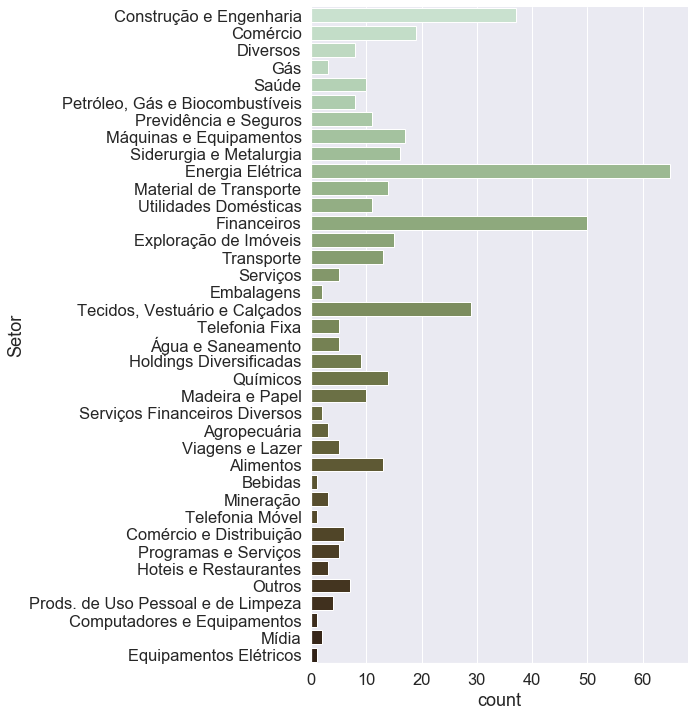

In [8]:
sns.catplot(y="Setor",
            kind="count", 
            palette="ch:7", 
            data=base,
            height=10, # altura do plot
            aspect=1) # a altura deve ser 1/10 da largura

## 1.2. Por subsetor?

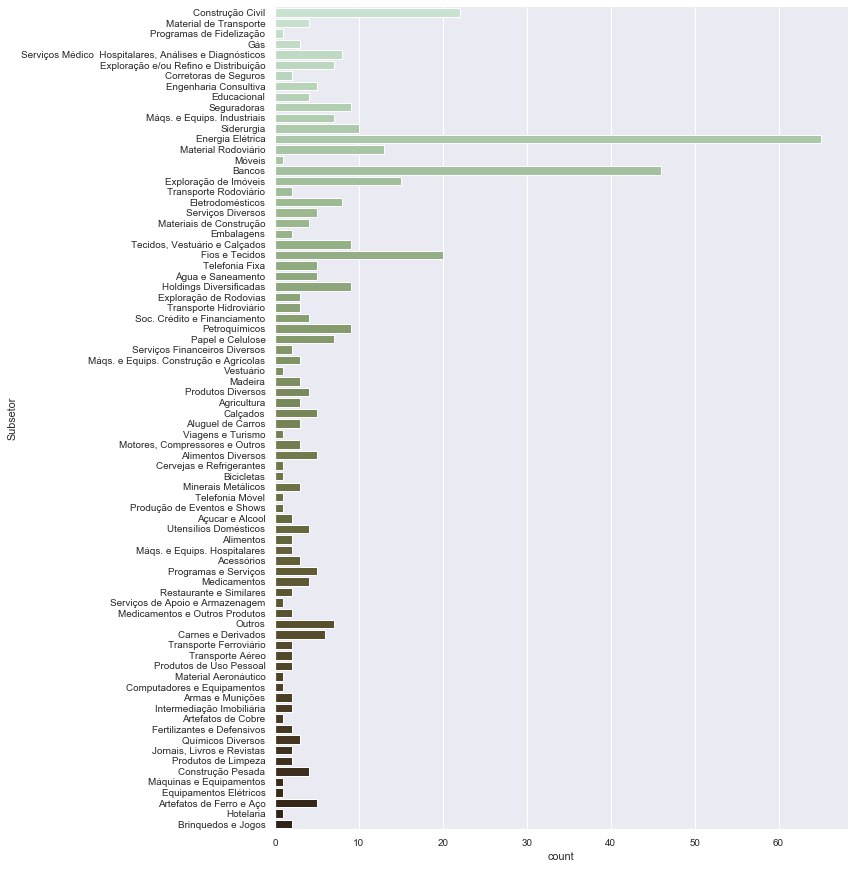

In [13]:
sns.set(font_scale=0.9)
sns.catplot(y="Subsetor",
            kind="count", 
            palette="ch:7", 
            data=base,
            height=12, # altura do plot
            aspect=1) # a altura deve ser 1/12 da largura

## Vamos visualizar o subsetor de uma outra maneira, usando a biblioteca matplotlib e colocando os setores em ordem crescente de número de empresas

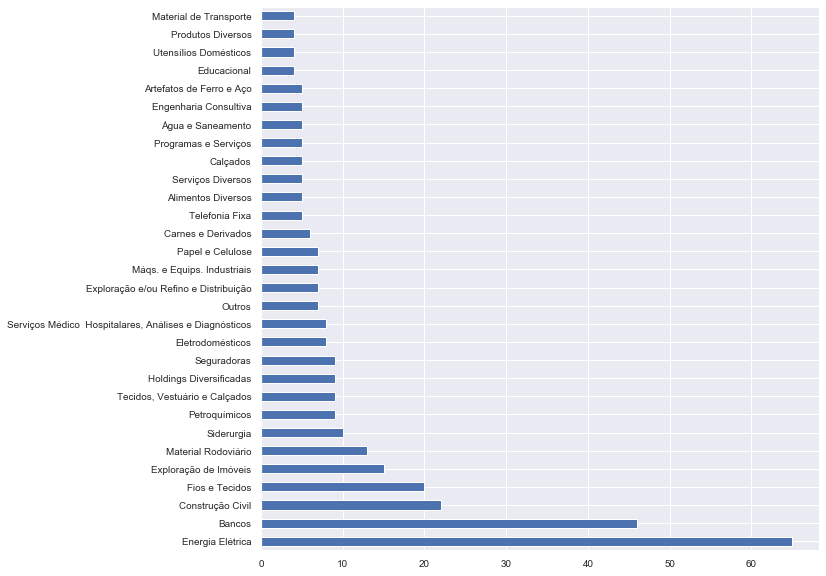

In [18]:
base['Subsetor'].value_counts().head(30).plot(kind='barh', figsize=(10,10))

### Como temos muitas ações na base, vamos visualizar os indicadores fundamentalistas consolidados por setor

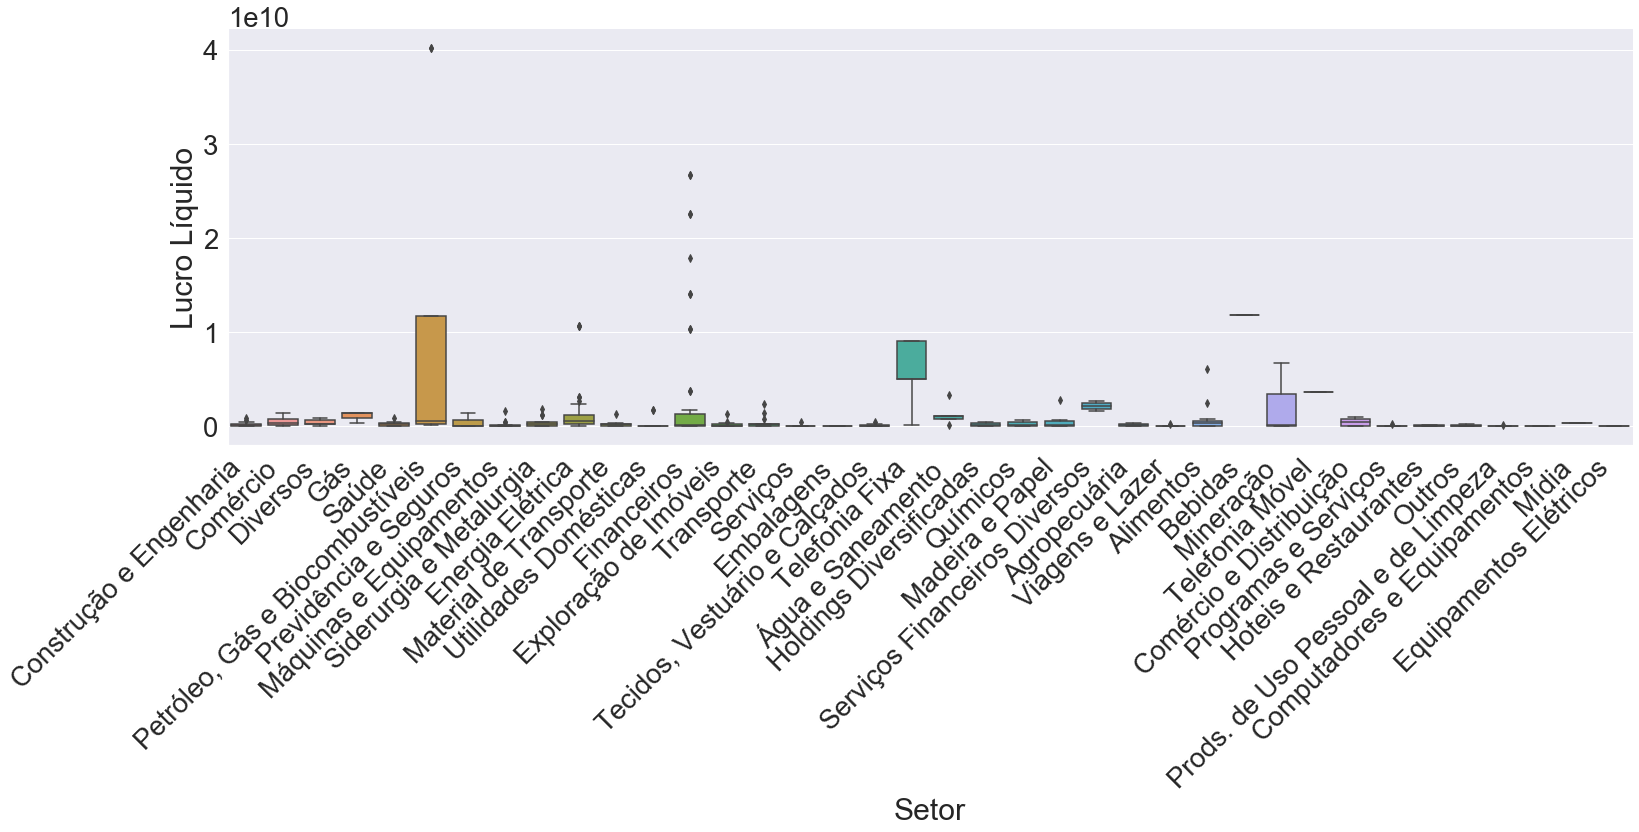

In [113]:
sns.set(font_scale=2.5)
chart = sns.catplot(x="Setor", y="Lucro Líquido", 
                    kind="box", data=base, height=8, aspect=3)
chart.set_xticklabels( rotation=45, horizontalalignment='right')

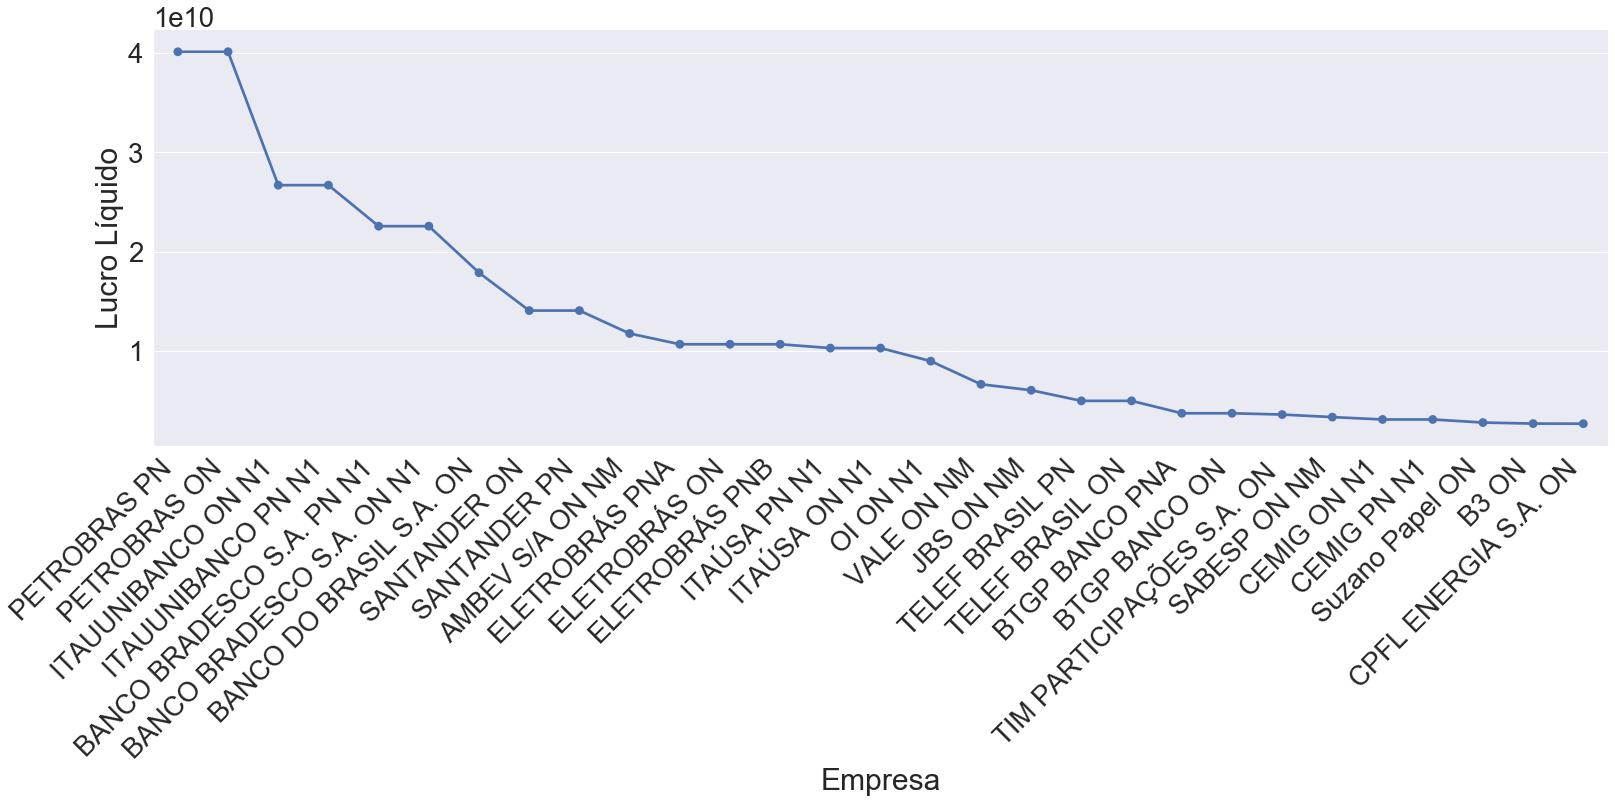

In [115]:
sns.set(font_scale=2.5)
chart = sns.catplot(x="Empresa", y="Lucro Líquido", kind="point", 
                    data=base.sort_values('Lucro Líquido', ascending=False).head(30),
                    height=8, aspect=3)
chart.set_xticklabels( rotation=45, horizontalalignment='right')

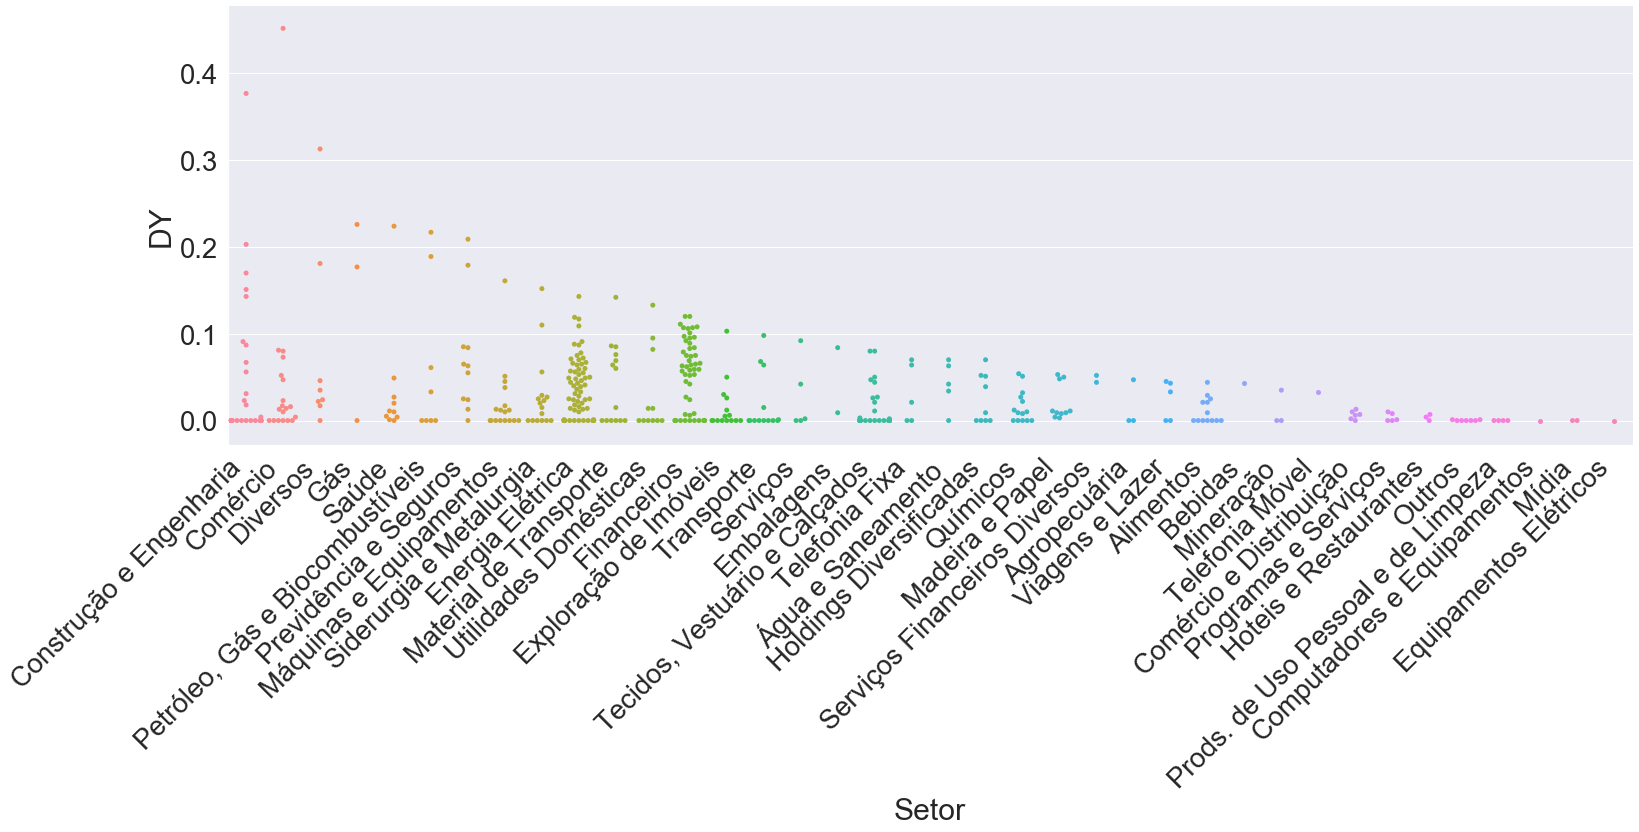

In [136]:
sns.set(font_scale=2.5)
chart = sns.catplot(x="Setor", y="DY", kind="swarm", 
                    data=base, height=8, aspect=3)
chart.set_xticklabels( rotation=45, horizontalalignment='right')

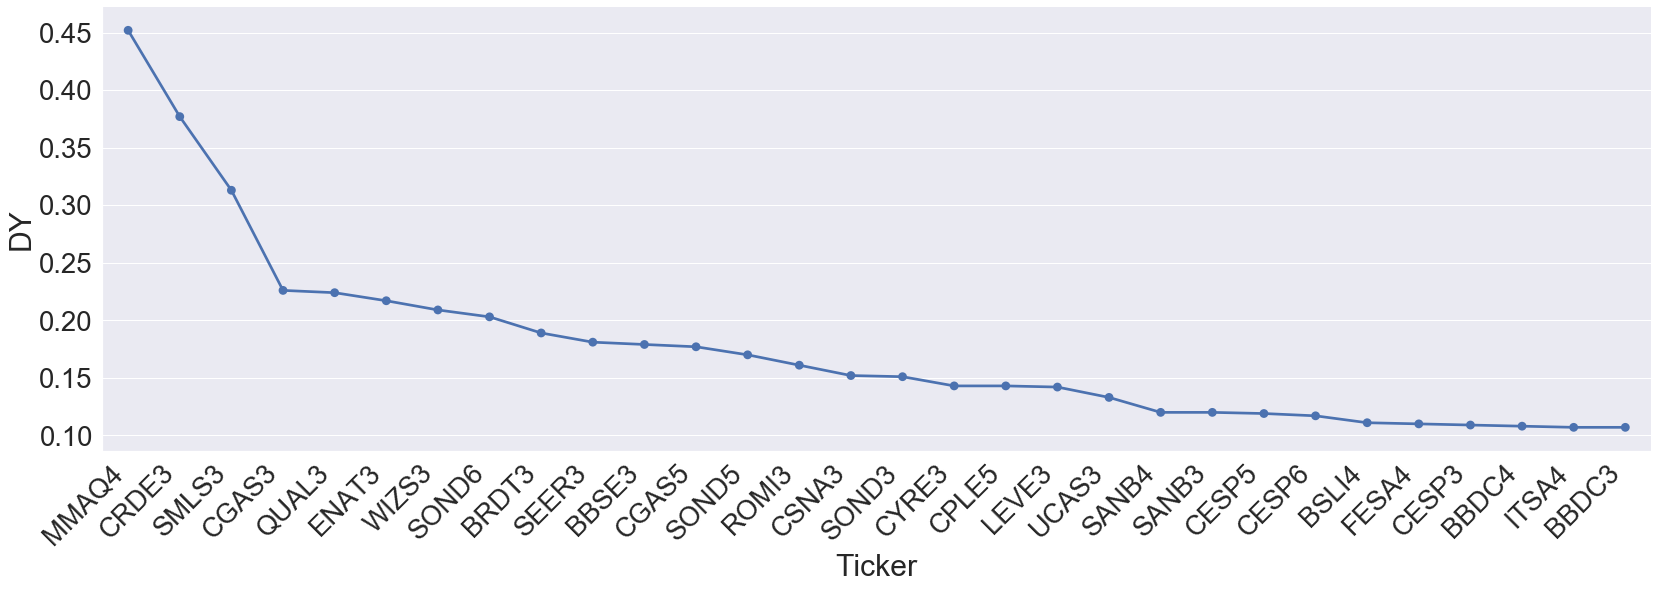

In [118]:
sns.set(font_scale=2.5)
chart = sns.catplot(x="Ticker", y="DY", kind="point", 
                    data=base.sort_values('DY', ascending=False).head(30),
                    height=8, aspect=3)
chart.set_xticklabels( rotation=45, horizontalalignment='right')

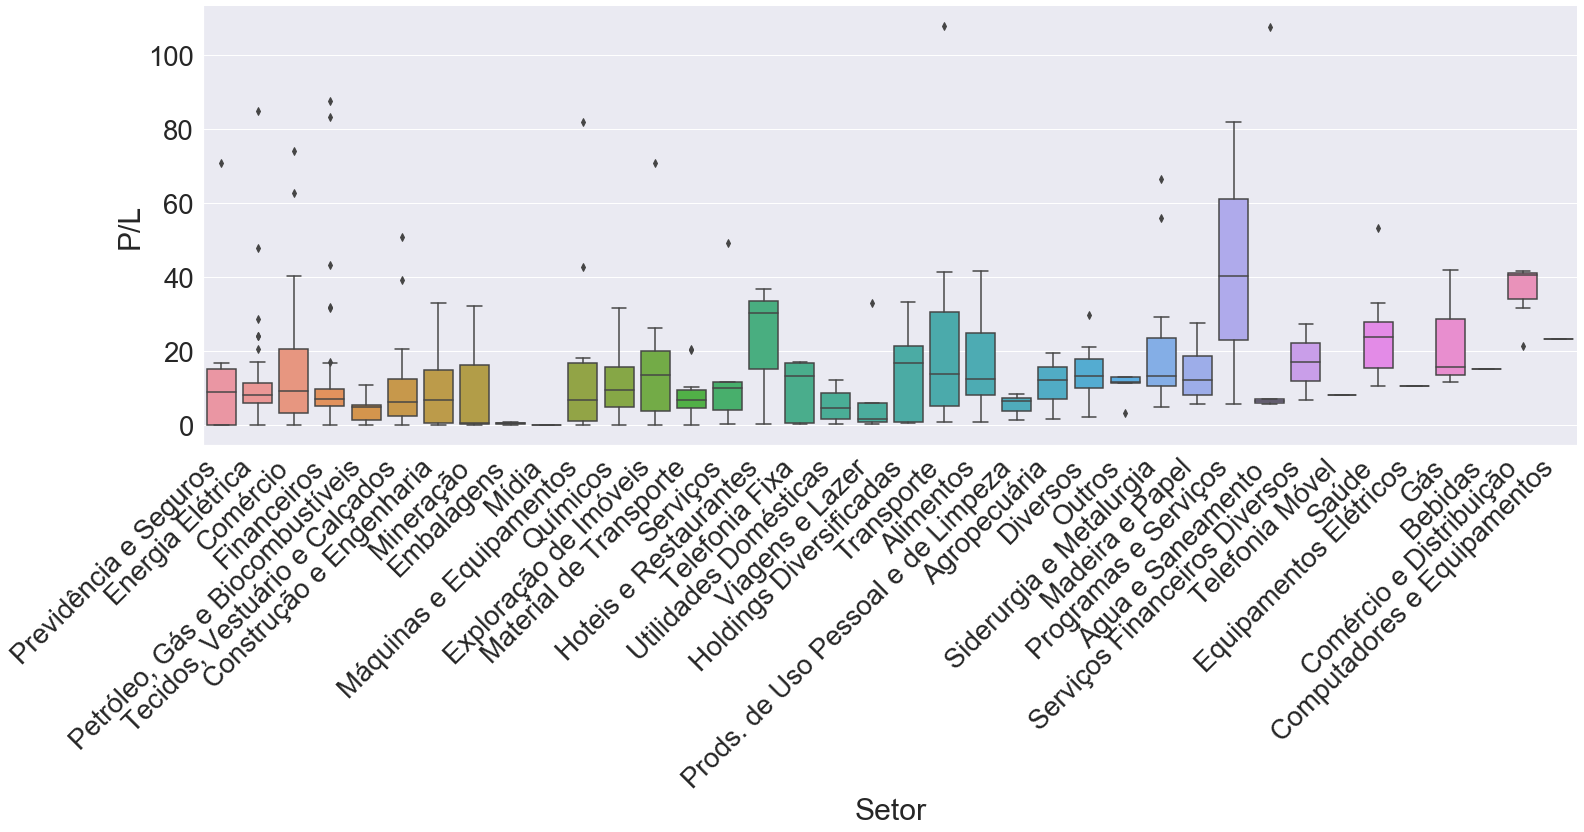

In [133]:
sns.set(font_scale=2.5)
chart = sns.catplot(x="Setor", y="P/L", kind="box", 
                    data=base.sort_values('P/L', ascending=True).head(420),
                    height=8, aspect=3)
chart.set_xticklabels( rotation=45, horizontalalignment='right')

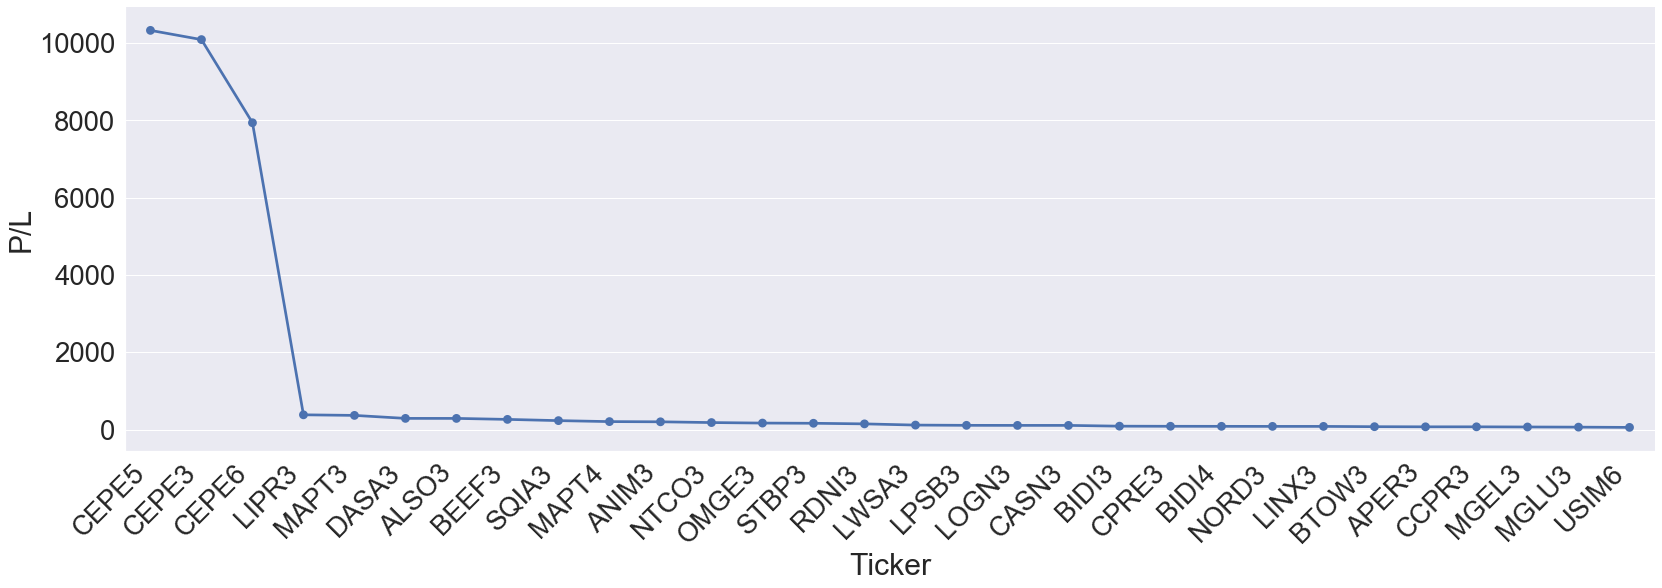

In [135]:
sns.set(font_scale=2.5)
chart = sns.catplot(x="Ticker", y="P/L", kind="point", 
                    data=base.sort_values('P/L', ascending=False).head(30),
                    height=8, aspect=3)
chart.set_xticklabels( rotation=45, horizontalalignment='right')

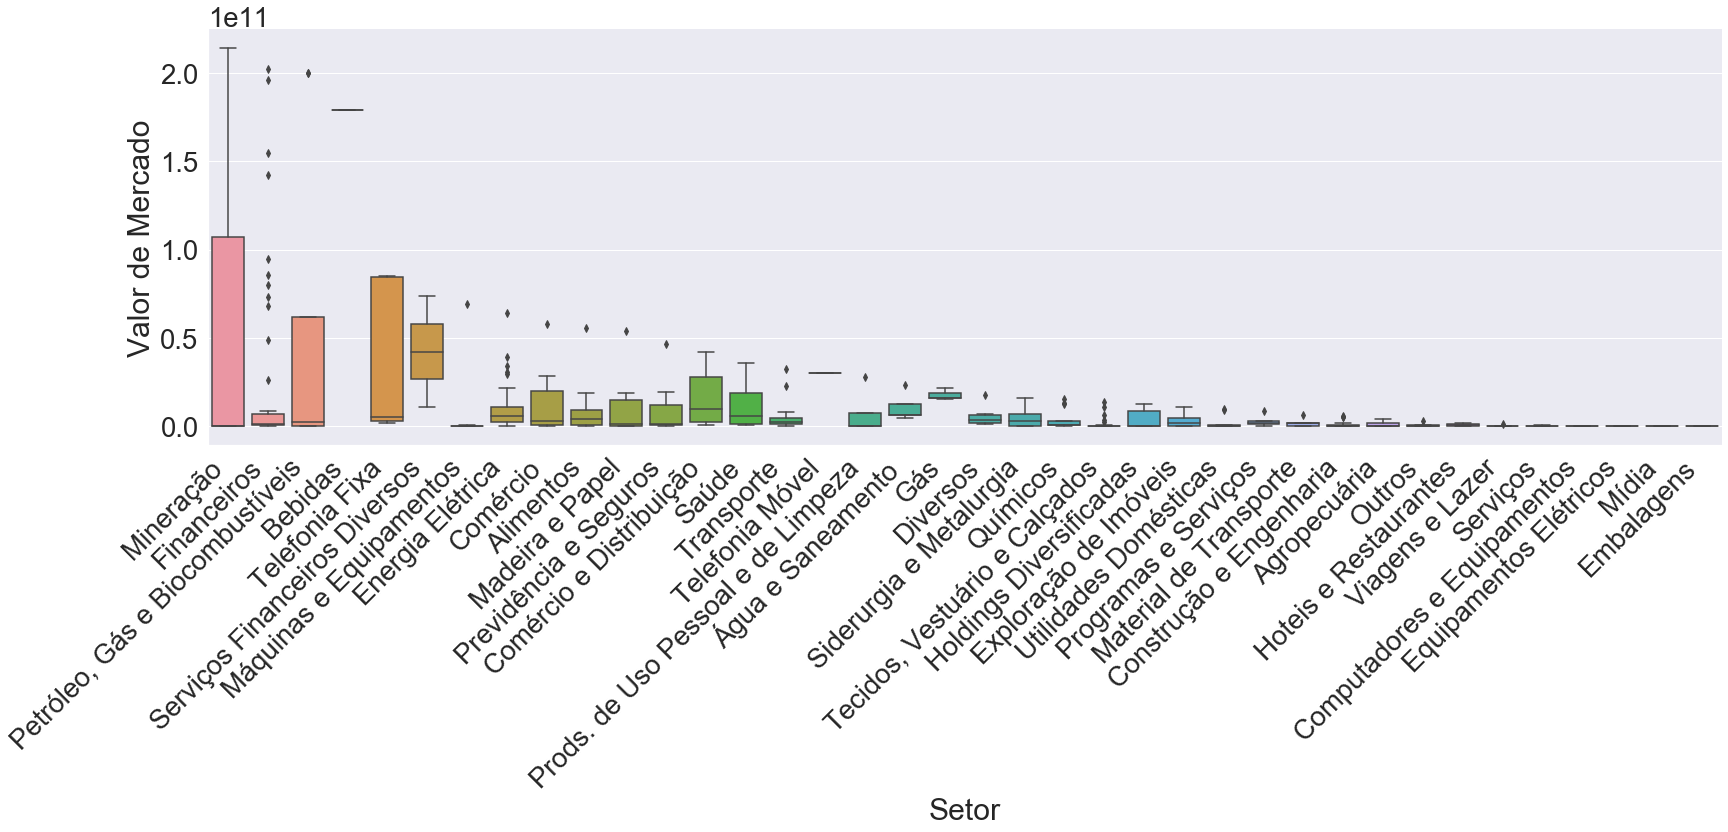

In [125]:
sns.set(font_scale=2.5)
chart = sns.catplot(x="Setor", y="Valor de Mercado", kind="box", 
                    data=base.sort_values('Valor de Mercado', ascending=False),
                    height=8, aspect=3)
chart.set_xticklabels( rotation=45, horizontalalignment='right')

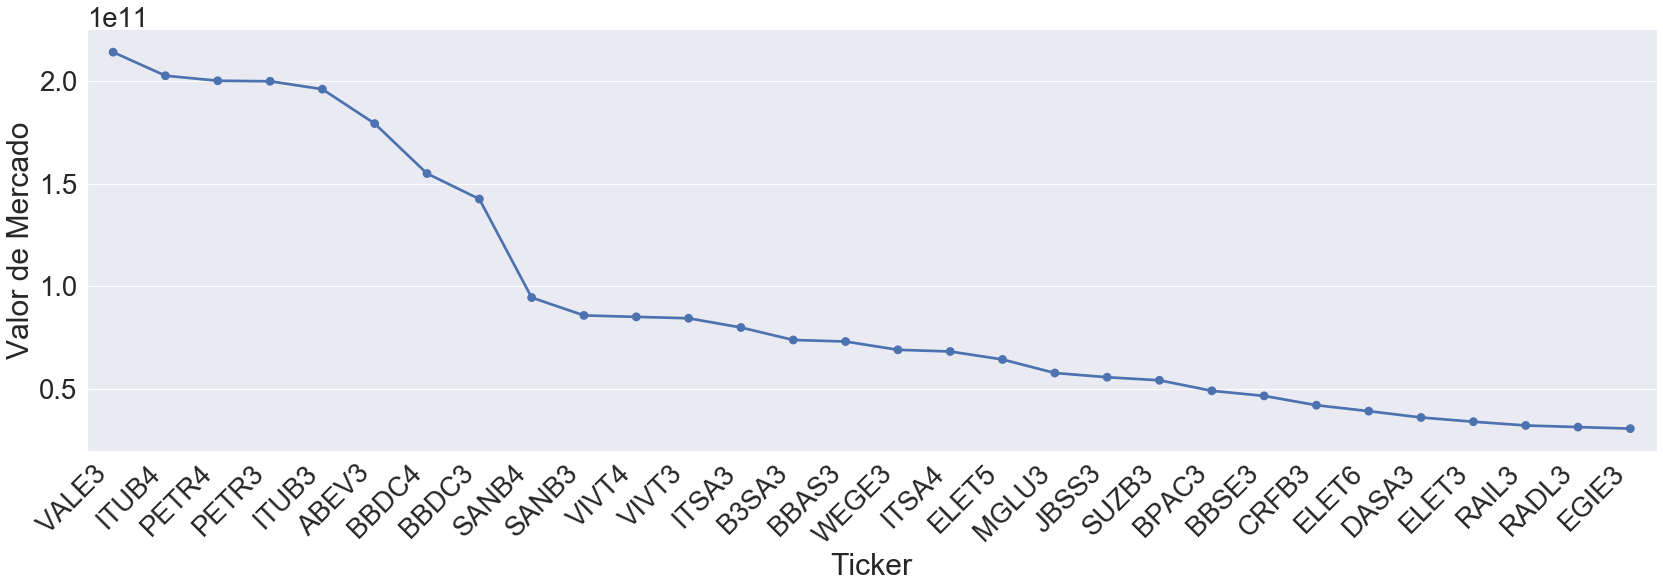

In [126]:
sns.set(font_scale=2.5)
chart = sns.catplot(x="Ticker", y="Valor de Mercado", kind="point", 
                    data=base.sort_values('Valor de Mercado', ascending=False).head(30),
                    height=8, aspect=3)
chart.set_xticklabels( rotation=45, horizontalalignment='right')

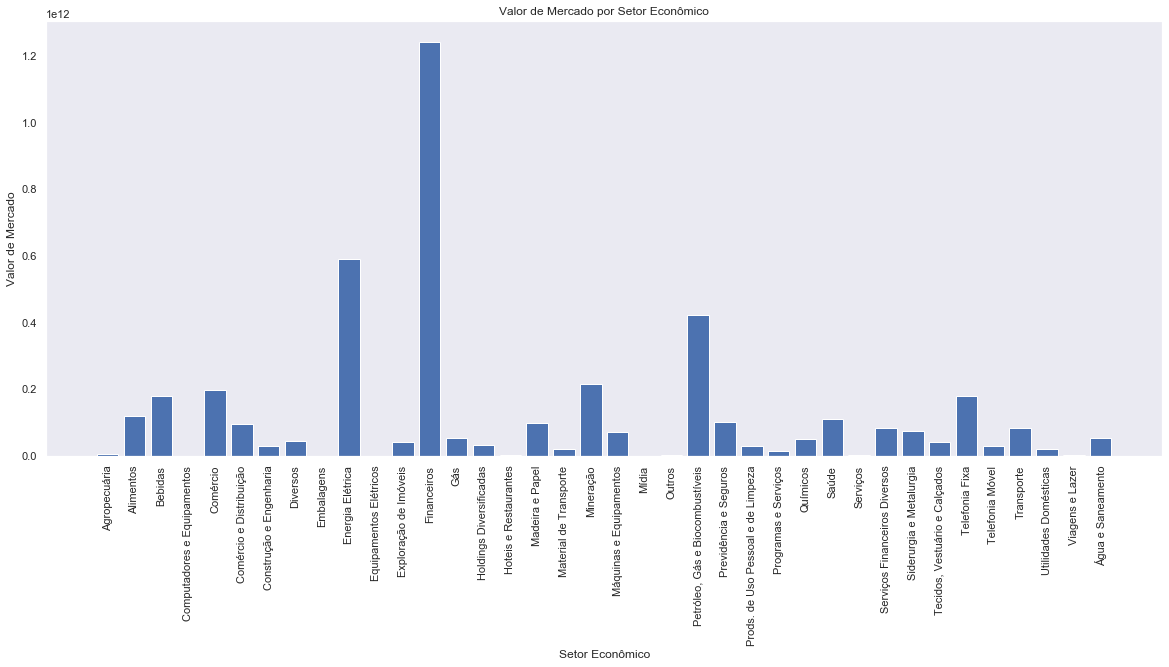

In [154]:
sns.set(font_scale=1)
base_plot = base.groupby('Setor').sum()
plt.figure(figsize=(20,8))
plt.bar(base_plot.index, base_plot['Valor de Mercado'])
plt.xlabel('Setor Econômico')
plt.xticks(rotation=90)
plt.ylabel('Valor de Mercado')
plt.title('Valor de Mercado por Setor Econômico')
plt.grid()
plt.show()
